# Customer Churn Prediction
---
### Summary:
This project analyzes customer churn data to identify the key factors influencing whether a customer leaves a telecom service. Using skills in data wrangling, exploratory data analysis (EDA), and statistical correlation, the project uncovers that features like contract type, tenure, and payment method are highly associated with customer retention. Visualization, feature interpretation, and data storytelling are applied to translate patterns into actionable insights for improving customer retention strategies.
                                                                                                                                                   
## Overview & Background:

A business will measure [**customer churn**](https://en.wikipedia.org/wiki/Churn_rate) as the loss of existing customers continuing doing business or using their service with the company, compared to the total number of customers in a given period of time. Analyzing customer churn is important for a business to understand why a customer will stop using their service or want to stop doing business with them. Improving their customer retention is good for building brand loyalty and increasing overall customer satisfaction and profitability. While there are formulas that are easy to calculate what the customer churn is, it is difficult to accurately predict.                    

This dataset that I will be using comes from a telecommunication company and it provides the home phone and internet services to 7043 customers in California. 


The data set includes information about:
 * **Customers who left within the last month** – the column is called `Churn`
 * **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 * **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 * **Demographic info about customers** – gender, age range, and if they have partners and dependents





In this project I will analyze the different factors that affect customer churn by creating regression models to identify correlation as well as creating a survival analysis model. I also create a prediction model using classification machine learning to accuractely predict the likeliness of a customer to churn.

Objectives:
 * What is the current churn percentage for this company?
 * What factors directly affect customer churn, and how does it differ? 
 * Does demographics or type of telecommunication service affect whether or not a customer will churn? 
 * Which services are the most profitable?
 * How long before a customer will change companies or churn?

The data comes from Kaggle and can be accessed [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

---
## Understanding the Data

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')



We will focus on the column ``Churn`` and all of the different columns/attributes that will correlate and affect customer churn.
There is data on 7043 customers and 21 columns/attributes on each customer.

---
## Data Cleaning

The first step is to check every column in the dataset for missing values. However, I noticed that the ``TotalCharges`` column is listed as an "object" instead of a "float64". We will change only the ``TotalCharges`` column into a number value and then track the number of missing values.

In [5]:
# Turn total charges into a number value and check for missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

I decided to replace the missing data as the media of the column to account for any outliers within the data. 

In [6]:
# Replace NaN with the column mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df = df.drop('customerID', axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The data now seems to be accounted for when it comes to missing data and so now we can move onto the visualizations.

---
## Data Visualizations

In this section I am going to create frequency tables that will compare the attribute of the customer to the churn. This is to look closely at the exact numbers between what is most common for customers to churn.

In [10]:
# Frequency of Churn/No Churn
churn_stats = df['Churn'].value_counts(normalize=True) * 100
churn_stats

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

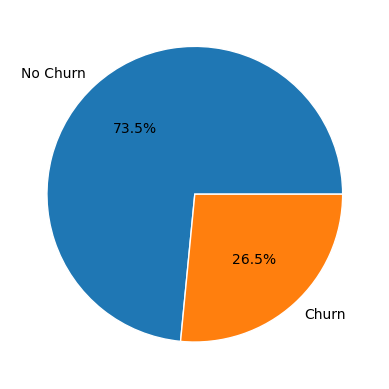

In [11]:
# Data visualization to churn/no churn

labels = 'No Churn', 'Churn'
sizes = [73.463013, 26.536987]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,
      wedgeprops=dict(edgecolor='white'), autopct='%1.1f%%')
plt.show()

There is overall a lot of "No Churn" from the customers, however there was about a quarter of the customers who did churn. We will look closer at why these customers might have churned and the factors that correlate with churning.

In [12]:
# Calculate the average of monthly charges for no churn
no_churn = df[df['Churn'] == 'No']
average_monthly_no_churn = no_churn['MonthlyCharges'].mean()
print(f"Average Monthly Charges for No Churn: {average_monthly_no_churn}")

# Calculate the median of monthly charges for no churn
median_monthly_no_churn = no_churn['MonthlyCharges'].median()
print(f"Median Monthly Charges for No Churn: {median_monthly_no_churn}")

# Calculate the average of monthly charges for churn
yes_churn = df[df['Churn'] == 'Yes']
average_monthly_yes_churn = yes_churn['MonthlyCharges'].mean()
print(f"Average Monthly Charges for Churn: {average_monthly_yes_churn}")

# Calculate the average of monthly charges for churn
median_monthly_yes_churn = yes_churn['MonthlyCharges'].median()
print(f"Median Monthly Charges for Churn: {median_monthly_yes_churn}")

Average Monthly Charges for No Churn: 61.26512369540008
Median Monthly Charges for No Churn: 64.42500000000001
Average Monthly Charges for Churn: 74.44133226324237
Median Monthly Charges for Churn: 79.65


The customers who churned generally have **higher monthly bills**. This could indicate that higher pricing is linked to dissatisfaction, especially if they feel it doesn't match the value they get. Median being higher than average (especially for churners) hints at some lower outliers — but many churners are paying high monthly fees.

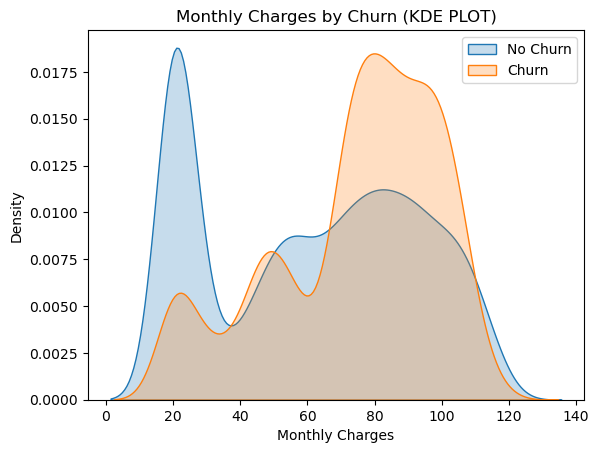

In [13]:
# Data visualization of churn/no churn based on monthly charges

# Filter and plot the data for 'Churn' == 0 and 'Churn' == 1
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'], fill = True, label="No Churn")
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'], fill = True, label="Churn")

# Add labels and title
plt.title('Monthly Charges by Churn (KDE PLOT)')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()

# Display the legend and the plot
plt.show()

Customers who churned had higher monthly charges on average. You can see the orange curve peaking around 70–100 USD. Customers who did not churn have two notable clusters: one peak at low monthly charges (around 20 USD) and another smaller one around 70–90 USD. This smooth curve helps you see general distribution trends and compare how spread out or concentrated the values are.

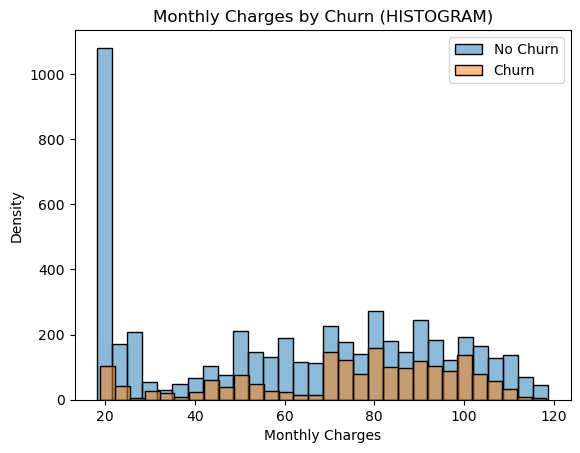

In [14]:
# Data visualization of churn/no churn based on monthly charges (histogram)

# Filter and plot the data for 'Churn' == 0 and 'Churn' == 1
sns.histplot(df.MonthlyCharges[df["Churn"] == 'No'], bins = 30, alpha = 0.5, label="No Churn")
sns.histplot(df.MonthlyCharges[df["Churn"] == 'Yes'], bins = 30, alpha = 0.5, label="Churn")

# Add labels and title
plt.title('Monthly Charges by Churn (HISTOGRAM)')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()

# Display the legend and the plot
plt.show()

A huge spike around 20 USD: A lot of customers are paying the minimum monthly charge, and most of them don’t churn (blue bars dominate). Customers who churn tend to be more evenly distributed across higher charge brackets. This plot is more literal and helps in understanding raw counts or frequency.

In [15]:
# Calculate the average of total charges for no churn
average_total_no_churn = no_churn['TotalCharges'].mean()
print(f"Average Total Charges for No Churn : {average_total_no_churn}")

# Calculate the average of total charges for churn
average_total_yes_churn = yes_churn['TotalCharges'].mean()
print(f"Average Total Charges for Churn: {average_total_yes_churn}")

# Calculate the median of total charges for no churn
median_total_no_churn = no_churn['TotalCharges'].median()
print(f"Median Total Charges for No Churn: {median_total_no_churn}")

# Calculate the median of total charges for churn
median_total_yes_churn = yes_churn['TotalCharges'].median()
print(f"Median Total Charges for Churn: {median_total_yes_churn}")

Average Total Charges for No Churn : 2552.882494201778
Average Total Charges for Churn: 1531.7960941680042
Median Total Charges for No Churn: 1679.525
Median Total Charges for Churn: 703.55


Non-churners have spent much more over time, which makes sense since they’ve stayed longer. The huge gap between median for churners (703 USD) and non-churners (1,679 USD) shows churners often leave before investing much. This is very similar to the monthly charges but takes tenure into account.

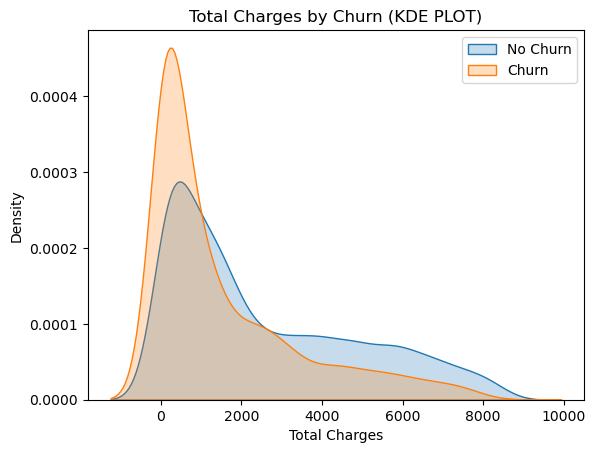

In [16]:
# Data visualization of churn/no churn based on total charges (kde plot)

# Filter and plot the data for 'Churn' == 0 and 'Churn' == 1
sns.kdeplot(df.TotalCharges[df["Churn"] == 'No'], fill = True, label="No Churn")
sns.kdeplot(df.TotalCharges[df["Churn"] == 'Yes'], fill = True, label="Churn")

# Add labels and title
plt.title('Total Charges by Churn (KDE PLOT)')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend()

# Display the legend and the plot
plt.show()

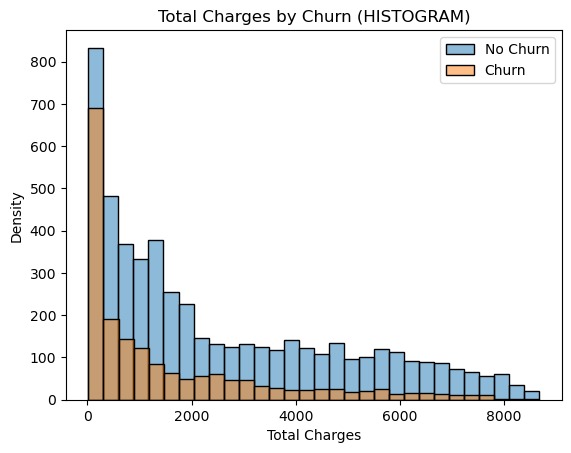

In [17]:
# Data visualization of churn/no churn based on total charges

# Filter and plot the data for 'Churn' == 0 and 'Churn' == 1
sns.histplot(df.TotalCharges[df["Churn"] == 'No'], bins = 30, alpha = 0.5, label="No Churn")
sns.histplot(df.TotalCharges[df["Churn"] == 'Yes'], bins = 30, alpha = 0.5, label="Churn")

# Add labels and title
plt.title('Total Charges by Churn (HISTOGRAM)')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend()

# Display the legend and the plot
plt.show()

Churned customers (orange) are clustered at low total charges, typically under 2000 USD, with a sharp peak very early. Non-churned customers (blue) are more widely distributed, with a long tail reaching 8000–9000 USD, suggesting they’ve been with the company longer.

In [18]:
# Calculate the average tenure for no churn
average_tenure_no_churn = no_churn['tenure'].mean()
print(f"Average Tenure for No Churn : {average_tenure_no_churn}")

# Calculate the median tenure for no churn
median_tenure_no_churn = no_churn['tenure'].median()
print(f"Median Tenure for No Churn: {median_tenure_no_churn}")

# Calculate the average tenure for churn
average_tenure_yes_churn = yes_churn['tenure'].mean()
print(f"Average Tenure for Churn: {average_tenure_yes_churn}")

# Calculate the median tenure for churn
median_tenure_yes_churn = yes_churn['tenure'].median()
print(f"Median Tenure for Churn: {median_tenure_yes_churn}")

Average Tenure for No Churn : 37.56996521066873
Median Tenure for No Churn: 38.0
Average Tenure for Churn: 17.979133226324237
Median Tenure for Churn: 10.0


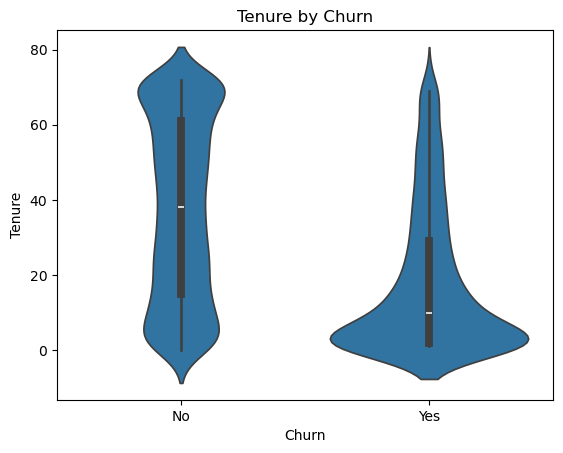

In [19]:
# Data visualization for tenure by churn
sns.violinplot(data = df, x = 'Churn', y = 'tenure')

# Add labels and title
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

# Display the legend and the plot
plt.show()

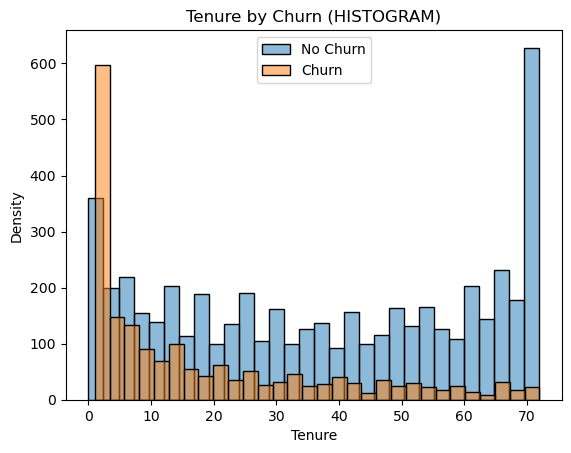

In [20]:
# Filter and plot the data for 'Churn' == 0 and 'Churn' == 1
sns.histplot(df.tenure[df["Churn"] == 'No'], bins = 30, alpha = 0.5, label="No Churn")
sns.histplot(df.tenure[df["Churn"] == 'Yes'], bins = 30, alpha = 0.5, label="Churn")

# Add labels and title
plt.title('Tenure by Churn (HISTOGRAM)')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend()

# Display the legend and the plot
plt.show()

The histogram and violin plot are similar in the fact that the distribution for the non-churned customers is even shows a normal distribution while the churned customers shows a larger concentration around 0-10 months while showing a right skew. This shows that those who churn have used the service for a short amount of time.                                                                         

The customers who churn overall have lower monthly and total charges and will churn after a shorter amount of time. This is a sign of the company possibly not being able to keep customer retention in the beginning of the service. There is a lot of customer loyalty since the tenure for non-churned customers is almost double those who do churn and monthly charges are also overall higher. 

Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1307      1647
Yes                 1655       166        48


Contract  Month-to-month   One year   Two year
Churn                                         
No             42.906842  25.260920  31.832238
Yes            88.550027   8.881755   2.568218


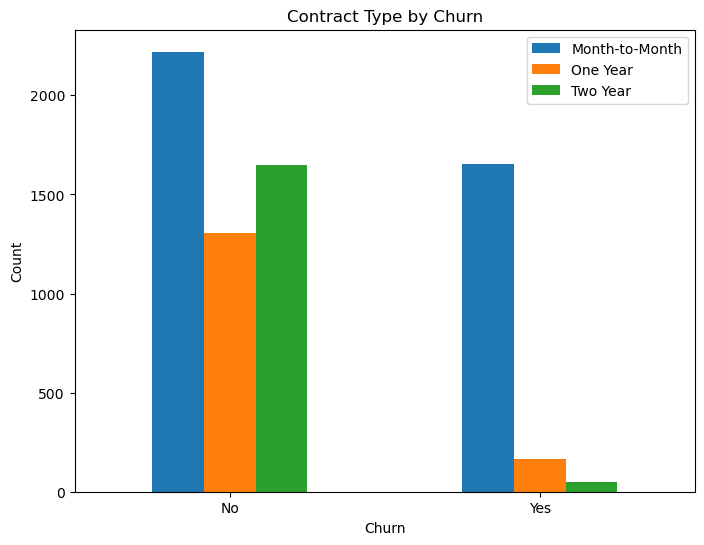

In [21]:
# Data visualization for Contract Type by Churn

#Frequency Table for contract type
contracttype_churn_counts = df.groupby(['Churn', 'Contract']).size().unstack(fill_value=0)
print(contracttype_churn_counts)
print("\n")

# Normalized frequency table for the contract type
contract_table_percent = contracttype_churn_counts.div(contracttype_churn_counts.sum(axis=1), axis=0) * 100
print(contract_table_percent)

# Create bar chart

# Plot the bar chart
contracttype_churn_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Contract Type by Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Month-to-Month', 'One Year', 'Two Year'], loc='upper right')

# Show the chart
plt.show()


About 88% of the churned-customers had a contract type that was month-to-month compared to the rest of the 12% that had One or Two year contracts. This might be because customers prefer to have more flexibility when it comes to their subscriptions so that they would be able to leave more easily. This explains why there are higher monthly charges for churned customers since those who might have chosen the one or two year contract could've gotten a discount. This also explain the lower total charges and shorter tenure.

In [22]:
# Frequency for each type of payment method
payment_stats = df['PaymentMethod'].value_counts(normalize=True) * 100
payment_stats


PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: proportion, dtype: float64

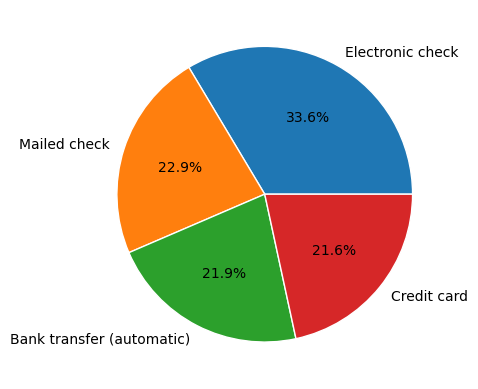

In [23]:
# Data visualization to show disitrbution of all four payment methods


labels = 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card'
sizes = [33.579441, 22.887974, 21.922476, 21.610109]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,
      wedgeprops=dict(edgecolor='white'), autopct='%1.1f%%')
plt.show()

In [24]:
payment_dist = df.groupby('Churn')['PaymentMethod'].value_counts().unstack()
print(payment_dist)
print('\n')

# Percentage for Payment Method in Customer Churn overall
payment_churn_percentage = df.groupby('Churn')['PaymentMethod'].value_counts(normalize=True).mul(100).unstack()
print(payment_churn_percentage)

PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                  1286                     1290   
Yes                                  258                      232   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                         1294          1304  
Yes                        1071           308  


PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                             24.855044                24.932354   
Yes                            13.804173                12.413055   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                    25.009664     25.202938  
Yes                   57.303371     16.479401  


PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                  1286                     1290   
Yes                                  258                      232   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                         1294          1304  
Yes                        1071           308  


PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                             24.855044                24.932354   
Yes                            13.804173                12.413055   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                    25.009664     25.202938  
Yes                   57.303371     16.479401  


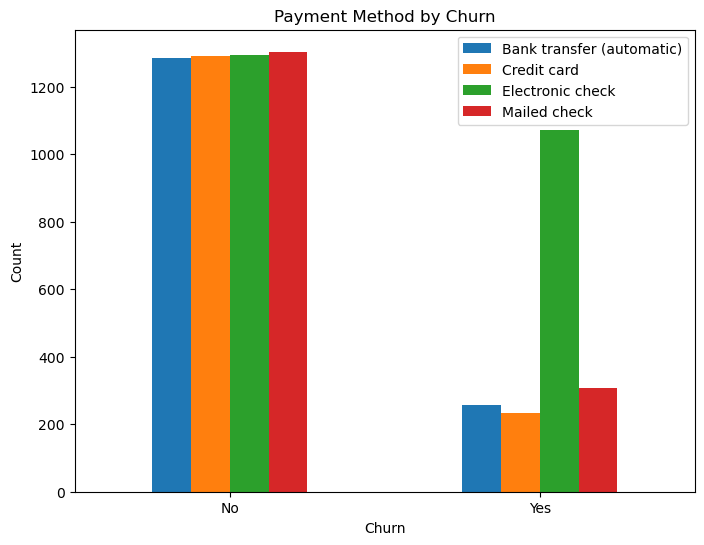

In [25]:
# Data visualization for payment method by Churn

#Frequency Table for contract type
payment_churn_counts = df.groupby(['Churn', 'PaymentMethod']).size().unstack(fill_value=0)
print(payment_churn_counts)
print("\n")

# Normalized frequency table for the contract type
payment_table_percent = payment_churn_counts.div(payment_churn_counts.sum(axis=1), axis=0) * 100
print(payment_table_percent)

# Create bar chart

# Plot the bar chart
payment_churn_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Payment Method by Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Bank transfer (automatic)', 'Credit card', 'Electronic check', 'Mailed check'], loc='upper right')

# Show the chart
plt.show()



More than half of the churned-customers (57%) had been paying with electronic check and the other types of payment methods were pretty evenly distributed. While the payment method is pretty evenly distributed among those who don't churn, the payment method may strongly influence those to leave. The electronic checks are likely for younger customers who are not always reliable and more budget-conscious, hence why there might be more cancellations. Mailed checks are associated with older customers Additionally, since it is a manual type of payment method compared to the automatic type that is bank transfers and credit cards, this will explain why those who do use electronic checks will want to cancel.

In [26]:
df = df.rename(columns={
    'PhoneService': 'Phone Service',
    'MultipleLines': 'Multiple Lines',
    'InternetService': 'Internet Service',
    'OnlineSecurity': 'Online Security',
    'OnlineBackup': 'Online Backup',
    'DeviceProtection': 'Device Protection',
    'TechSupport': 'Tech Support',
    'StreamingTV': 'Streaming TV',
    'StreamingMovies': 'Streaming Movies',
})

service = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 
            'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
def generate_service_frequency_by_churn(df, service):
    for col in service:
        print(f"\nFrequency Table for '{col}' (Grouped by Churn):")
        print(df.groupby('Churn')[col].value_counts())  # Raw counts
        print("\nPercentage Distribution by Churn:")
        print(df.groupby('Churn')[col].value_counts(normalize=True).mul(100).round(2))  # Percentage
        print("-" * 60)

# Call function on the service columns
generate_service_frequency_by_churn(df, service)


Frequency Table for 'Phone Service' (Grouped by Churn):
Churn  Phone Service
No     Yes              4662
       No                512
Yes    Yes              1699
       No                170
Name: count, dtype: int64

Percentage Distribution by Churn:
Churn  Phone Service
No     Yes              90.1
       No                9.9
Yes    Yes              90.9
       No                9.1
Name: proportion, dtype: float64
------------------------------------------------------------

Frequency Table for 'Multiple Lines' (Grouped by Churn):
Churn  Multiple Lines  
No     No                  2541
       Yes                 2121
       No phone service     512
Yes    Yes                  850
       No                   849
       No phone service     170
Name: count, dtype: int64

Percentage Distribution by Churn:
Churn  Multiple Lines  
No     No                  49.11
       Yes                 40.99
       No phone service     9.90
Yes    Yes                 45.48
       No              

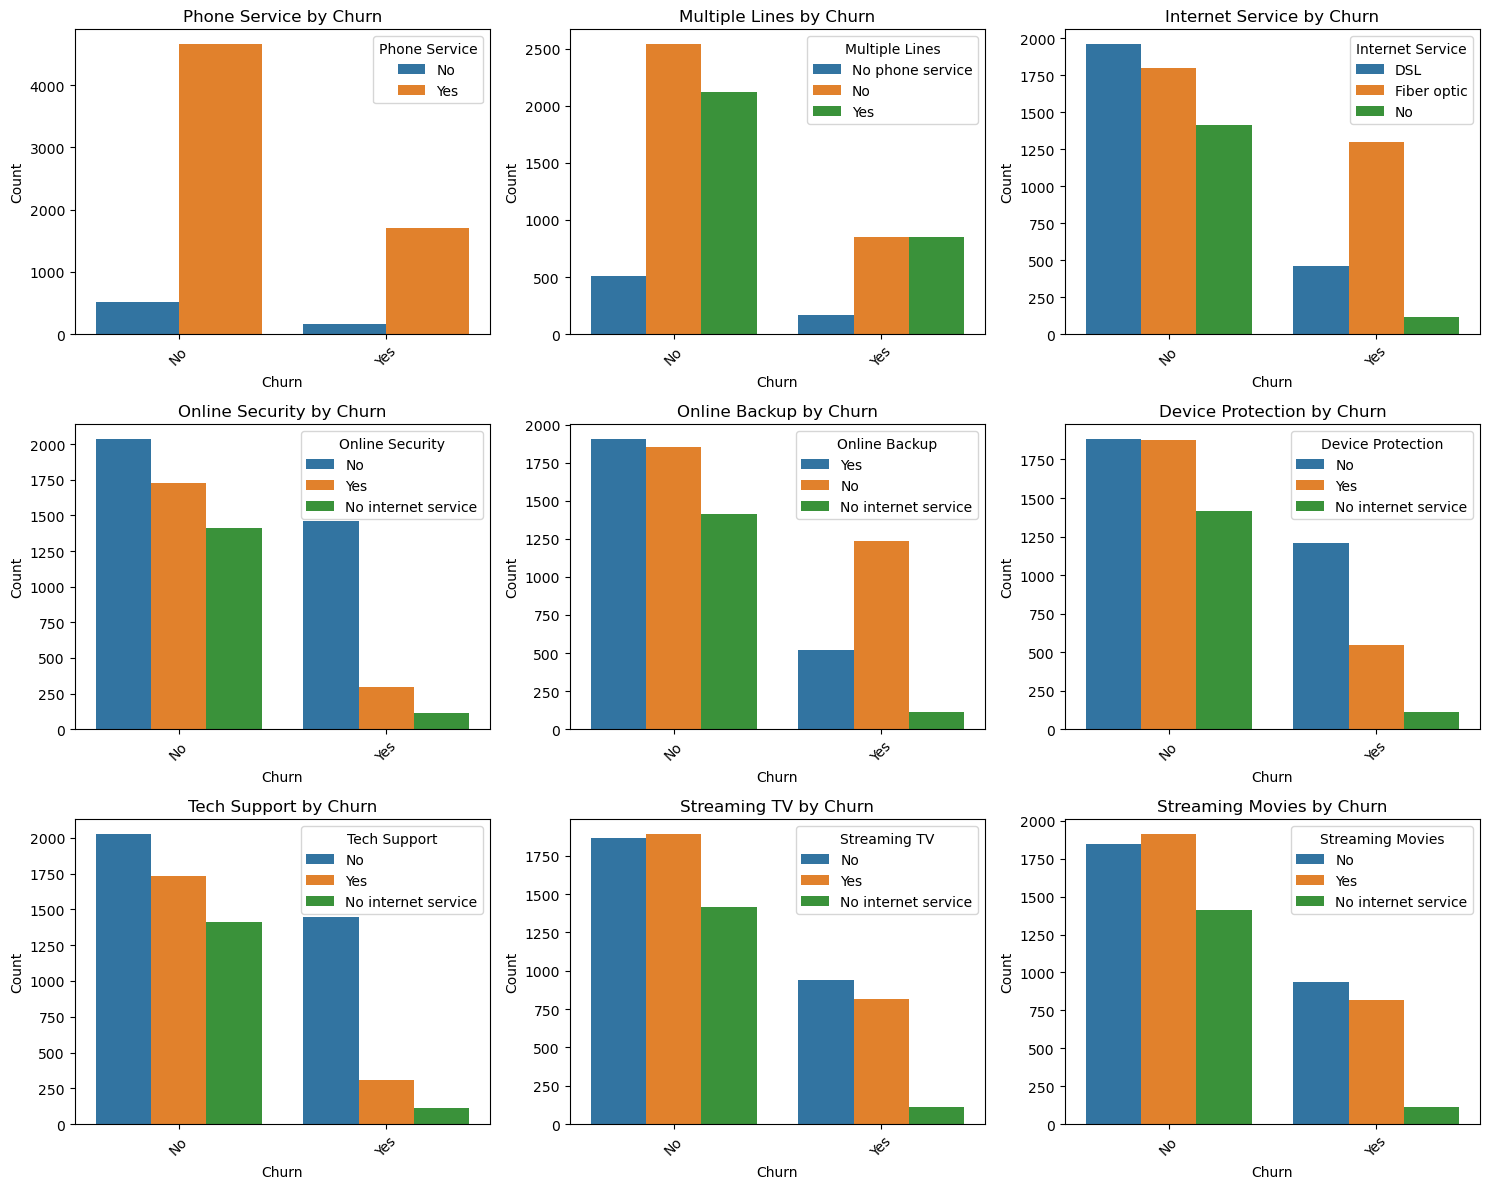

In [27]:
# Data visualization for different telecommunication services by Churn

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid
axes = axes.flatten()  # Flatten to loop easily

# Generate bar charts for each service column
for i, col in enumerate(service):
    sns.countplot(data=df, x='Churn', hue=col, ax=axes[i])
    axes[i].set_title(f"{col} by Churn")
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Phone Service by Churn:
* Most customers who churn have phone service.
* Very few customers without phone service churn.
* Customers without phone service might already have minimal plans and less to be dissatisfied with.
* Customers who have phone service might expect more value and are more likely to leave if unsatisfied.

Multiple Lines by Churn:
* More churn occurs among those with multiple lines.
* Fewer customers with no phone service churn.
* Customers with multiple lines may be managing costs or service across several users—if service isn't up to expectations, they're quicker to switch.
* Could indicate dissatisfaction with bundled services.

Internet Service by Churn:
* Fiber optic users have higher churn compared to DSL.
* Those without internet service rarely churn.
* Fiber users may be more tech-savvy or expect top-tier service—if performance doesn’t match, they churn.
* DSL users might be more passive or in areas with fewer options.
* No internet service group likely has simpler needs and fewer reasons to churn.

Online Security by Churn:
* Customers without online security churn more than those with it.
* Those with no internet service churn the least.
* Online security might indicate higher engagement and investment in services—leading to greater retention.
* Lack of this service could signal lower satisfaction or less trust in provider.

Device Protection by Churn:
* Those without device protection churn more.
* Protection services increase perceived value, and customers are less likely to churn when they’ve invested in extras.
* It may also indicate that they are more digitally engaged and have more devices, leading to higher reliance on provider.

Tech Support by Churn: 
* More churn among customers without tech support.
* Tech support adds convenience and problem-solving, reducing frustration.
* Those without support may feel neglected when issues arise, increasing churn.

Streaming TV by Churn: 
* Churn is higher among those not using streaming TV.
* Streaming services add entertainment value—more features keep customers engaged.
* Those not using this feature might feel they’re paying for services they don’t use.

Streaming Movies by Churn: 
* Very similar to Streaming TV—higher churn for those not using it.
* The more services a customer uses (like streaming), the more value they perceive and the less likely they are to leave.
* Customers who don’t use streaming may not see enough benefit to stay.

In [28]:
# Create frequency table for each demographic

# Rename columns
df = df.rename(columns = {
    'gender' : 'Gender',
    'SeniorCitizen' : 'Senior Citizen'
})

# Rename values in the 'Senior Citizen' column
df['Senior Citizen'] = df['Senior Citizen'].replace({0: 'No', 1: 'Yes'})
               
# Data visualization for demographics
demographics = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

# Frequency table function
def generate_demographic_frequency_by_churn(df, demographics):
    for col in demographics:
        print(f"\nFrequency Table for '{col}' (Grouped by Churn):")
        print(df.groupby('Churn')[col].value_counts())  # Raw counts
        print("\nPercentage Distribution by Churn:")
        print(df.groupby('Churn')[col].value_counts(normalize=True).mul(100).round(2))  # Percentage
        print("-" * 60)

# Call function on the demographics columns
generate_service_frequency_by_churn(df, demographics)


Frequency Table for 'Gender' (Grouped by Churn):
Churn  Gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: count, dtype: int64

Percentage Distribution by Churn:
Churn  Gender
No     Male      50.73
       Female    49.27
Yes    Female    50.24
       Male      49.76
Name: proportion, dtype: float64
------------------------------------------------------------

Frequency Table for 'Senior Citizen' (Grouped by Churn):
Churn  Senior Citizen
No     No                4508
       Yes                666
Yes    No                1393
       Yes                476
Name: count, dtype: int64

Percentage Distribution by Churn:
Churn  Senior Citizen
No     No                87.13
       Yes               12.87
Yes    No                74.53
       Yes               25.47
Name: proportion, dtype: float64
------------------------------------------------------------

Frequency Table for 'Partner' (Grouped by Churn):
Churn  Partner
No     Yes        27

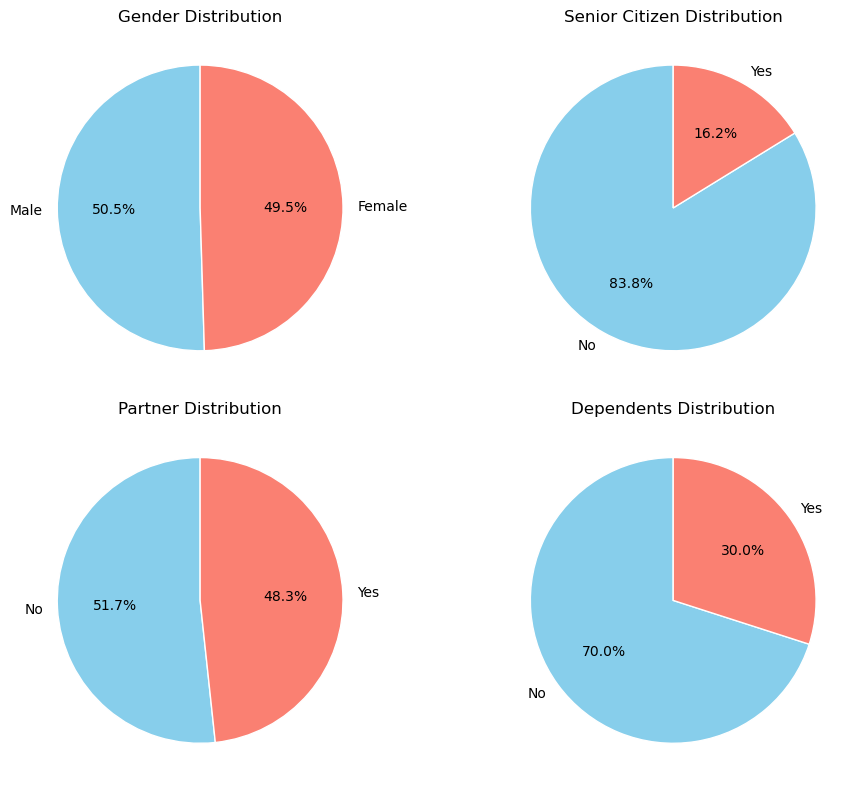

In [29]:
# Set up the figure (for a 2x2 grid layout)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid for 4 demographic features
axes = axes.flatten()

# Loop through demographic columns to create pie charts
for i, col in enumerate(demographics):
    ax = axes[i]
    
    # Get the value counts for the demographic column
    demographic_counts = df[col].value_counts()

    # Create pie chart for the demographic distribution
    ax.pie(
        demographic_counts, labels=demographic_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['skyblue', 'salmon'], wedgeprops={'edgecolor': 'white'}
    )
    ax.set_title(f'{col} Distribution')

# Adjust layout and display the pie charts
plt.tight_layout()
plt.show()

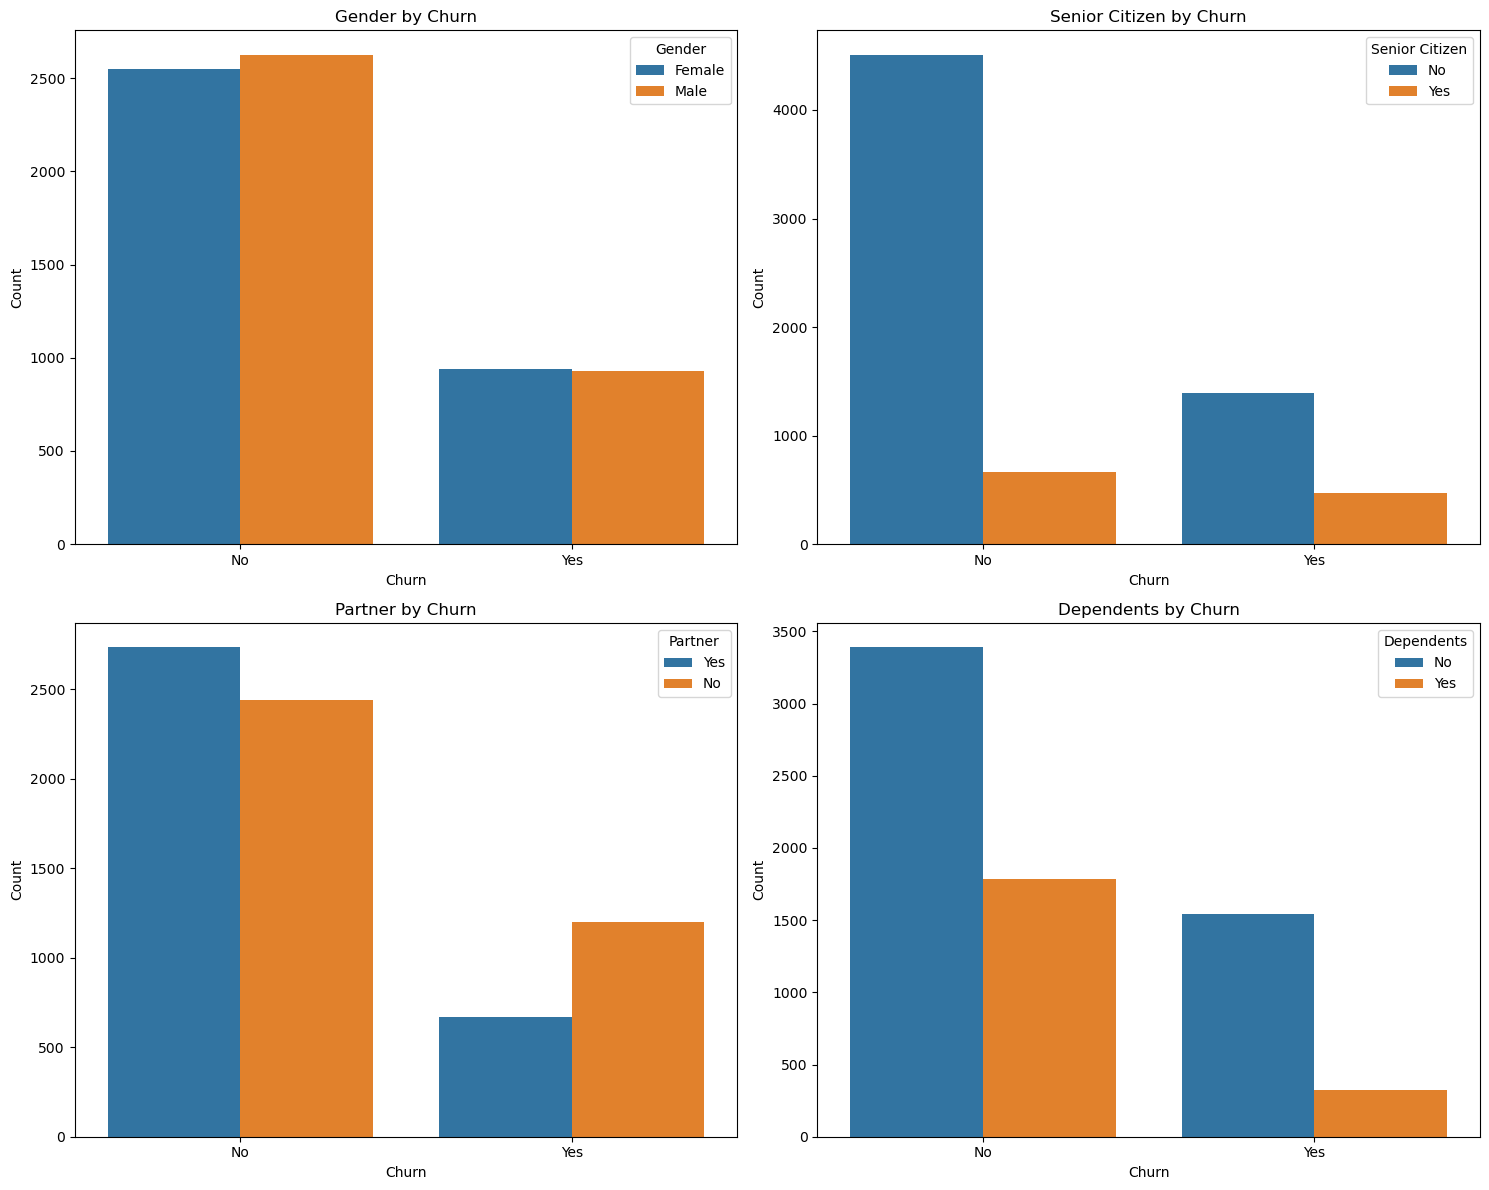

In [30]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))  # 2x2 grid
axes = axes.flatten()  # Flatten to loop easily

# Generate bar charts for each service column
for i, col in enumerate(demographics):
    sns.countplot(data=df, x='Churn', hue=col, ax=axes[i])
    axes[i].set_title(f"{col} by Churn")
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=0)  # Rotate x-axis labels for readability

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Gender:
* The distributions are practically the same, which means that gender probably does not affect whether someone churns or not.

Partner vs. No Partner:
* Overall distributions for non-churned customers look the same, which might show that having a partner is not significant to whether a customer will churn.
* Lower commitment/stability: People without a partner may be more mobile or less tied down, making them more likely to switch providers.
* Financial independence: Solo individuals may be more cost-sensitive and quicker to cut services they don’t find essential.

Senior Citizens:
* The nearly equal churn rate suggests that age alone isn't a strong predictor of churn.
* Some senior citizens may stay for familiarity, while others may churn due to changes in needs (e.g., downsizing, switching to simpler plans).
                                                                                                
Dependents v. No Dependents:
* Customers without dependents has a significantly higher proportion of churning than those with a dependent.
* Stability and routine: Families are often more reluctant to change providers due to the inconvenience.
* Higher service bundling: Families may use more services (like internet, streaming, tech support), making them less likely to leave.
* Shared responsibility: Parents or caretakers may rely more heavily on stable service for work, education, or entertainment at home.


---
## Survival Analysis Model

**Survival Function**

Using the cdf, we can calculate the survival function, or the probability that the event has not occurred by the time $t$. This means that, S(t) gives us the proportion of population with the time to event value more than t. The survival function looks like:

$$S(t)=1-F(t)=P(T\geq t)$$

We can also express this as an integral:

$$\int_{t}^{\infty}f(x)dx$$


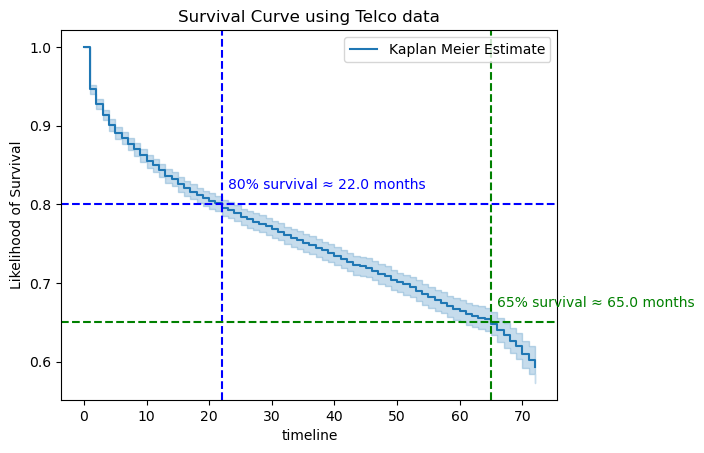

In [31]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
durations = df['tenure'] 
event_observed = df['Churn'] 

km = KaplanMeierFitter() 

km.fit(durations, event_observed, label='Kaplan Meier Estimate')

km.plot()
# Helper function to find the time when survival function drops below a given probability
def time_at_survival_threshold(kmf, threshold):
    sf = kmf.survival_function_
    return sf[sf[kmf._label] <= threshold].index.min()

# Thresholds
thresholds = [0.8, 0.65]
colors = ['blue', 'green']

for thresh, color in zip(thresholds, colors):
    time = time_at_survival_threshold(km, thresh)
    if pd.notna(time):
        # Horizontal and vertical lines
        plt.axhline(thresh, color=color, linestyle='dashed')
        plt.axvline(time, color=color, linestyle='dashed')
        
        # Annotate the point
        plt.text(time + 1, thresh + 0.02,
                 f"{int(thresh*100)}% survival ≈ {time} months",
                 color=color, fontsize=10)
plt.title('Survival Curve using Telco data')
plt.ylabel('Likelihood of Survival');

Analysis of this graph:

There is _80% probability of survival_ beyond about 22 months and _65% probability of survival_ beyond about 65 months. 

This graph represents the likeliness of survival (not churning), how long a customer will stay before changing companies or churning.

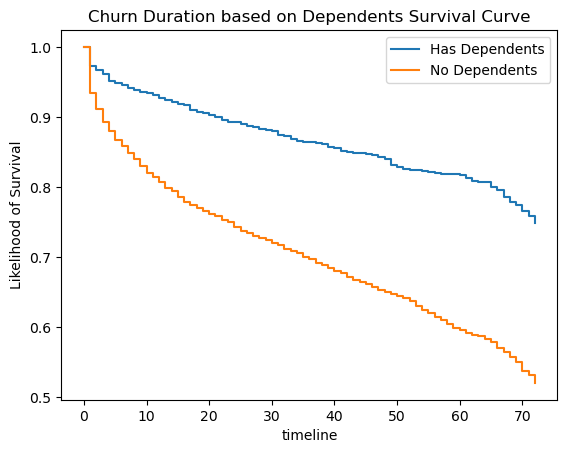

In [32]:
# Group 1: Has Dependents
kmf_ch1 = KaplanMeierFitter() 
T1 = df.loc[df['Dependents'] == 'Yes', 'tenure']
E1 = df.loc[df['Dependents'] == 'Yes', 'Churn']
kmf_ch1.fit(T1, E1, label='Has Dependents')   
ax = kmf_ch1.plot(ci_show=False)

# Group 2: Doesn't have Dependents
kmf_ch2 = KaplanMeierFitter() 
T2 = df.loc[df['Dependents'] == 'No', 'tenure']
E2 = df.loc[df['Dependents'] == 'No', 'Churn']
kmf_ch2.fit(T2, E2, label='No Dependents')   
ax = kmf_ch2.plot(ci_show=False)

plt.title("Churn Duration based on Dependents Survival Curve")
plt.ylabel('Likelihood of Survival');

Customers with dependents consistently have a higher survival rate (are more likely to stay over time). Customers without dependents churn at a faster rate, as shown by the steeper drop in the orange line. Dependents may increase financial and logistical reliance on services, making customers less likely to switch or cancel. People with dependents might value stability and convenience more, leading them to stick with their current provider. Those without dependents may feel freer to shop around or cancel, especially if they’re younger or more budget-conscious. They might also be more sensitive to price increases or less invested in bundled features (like family plans or protection services).

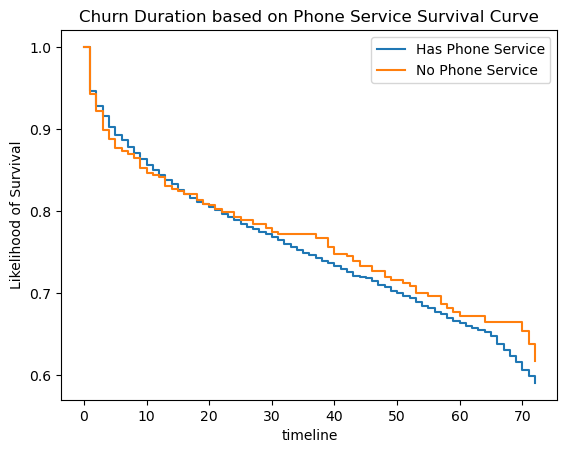

In [33]:
# Group 1: Has Phone Service
kmf_ch1 = KaplanMeierFitter() 
T1 = df.loc[df['Phone Service'] == 'Yes', 'tenure']
E1 = df.loc[df['Phone Service'] == 'Yes', 'Churn']
kmf_ch1.fit(T1, E1, label='Has Phone Service')   
ax = kmf_ch1.plot(ci_show=False)

# Group 2: Doesn't have Phone Service
kmf_ch2 = KaplanMeierFitter() 
T2 = df.loc[df['Phone Service'] == 'No', 'tenure']
E2 = df.loc[df['Phone Service'] == 'No', 'Churn']
kmf_ch2.fit(T2, E2, label='No Phone Service')   
ax = kmf_ch2.plot(ci_show=False)

plt.title("Churn Duration based on Phone Service Survival Curve")
plt.ylabel('Likelihood of Survival');

Having a phone service or not does not necessarily affect whether someone churns or not. Phone service might not be the primary reason customers choose or stay with the provider. Things like internet service or bundled packages may carry more weight in their decision-making. If the majority of customers opt into phone service by default, the variable doesn’t have enough variation to show a strong effect on churn. Those who opted out of phone service may not need it, so they're not missing anything, and this doesn’t push them to churn either.

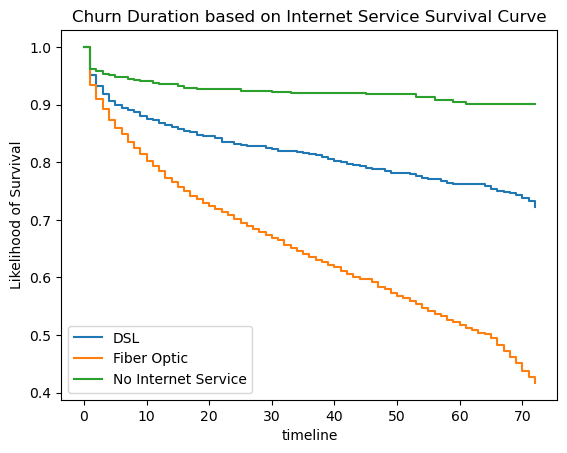

In [34]:
# Group 1: DSL Internet Service
kmf_ch1 = KaplanMeierFitter() 
T1 = df.loc[df['Internet Service'] == 'DSL', 'tenure']
E1 = df.loc[df['Internet Service'] == 'DSL', 'Churn']
kmf_ch1.fit(T1, E1, label='DSL')   
ax = kmf_ch1.plot(ci_show=False)

# Group 2: Fiber Optic Internet Service
kmf_ch2 = KaplanMeierFitter() 
T2 = df.loc[df['Internet Service'] == 'Fiber optic', 'tenure']
E2 = df.loc[df['Internet Service'] == 'Fiber optic', 'Churn']
kmf_ch2.fit(T2, E2, label='Fiber Optic')   
ax = kmf_ch2.plot(ci_show=False)

# Group 3: No Internet Service
kmf_ch3= KaplanMeierFitter() 
T3 = df.loc[df['Internet Service'] == 'No', 'tenure']
E3 = df.loc[df['Internet Service'] == 'No', 'Churn']
kmf_ch3.fit(T3, E3, label='No Internet Service')   
ax = kmf_ch3.plot(ci_show=False)

plt.title("Churn Duration based on Internet Service Survival Curve")
plt.ylabel('Likelihood of Survival');

The high customer churn for the fiber optic internet is likely due to customers having high expectations and then left dissatisfied with the outcome. Fiber Optic is marketed as premium, high-speed internet. If the service doesn’t meet expectations, users may be quick to leave. It’s usually more expensive. If users don’t see the value, especially during tough economic times, they might switch to cheaper options or cancel. People using DSL might not expect blazing speed, so they're more patient. DSL is often the only option in less populated areas, making churn less likely due to limited alternatives. This also might appeal more towards price-sensitive customers as they might prefer lower costs when it comes to their internet. 

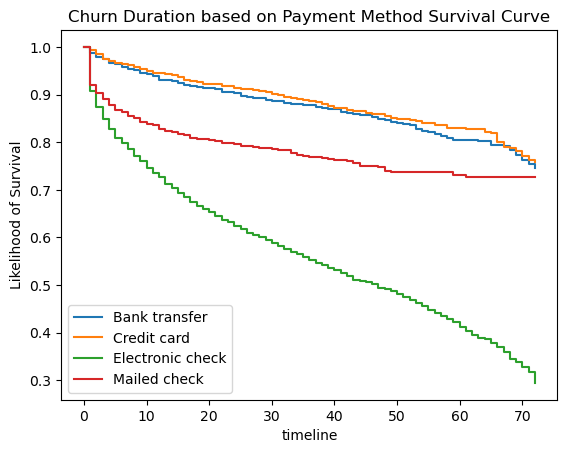

In [35]:
# Group 1: Bank transfer (automatic)
kmf_ch1 = KaplanMeierFitter() 
T1 = df.loc[df['PaymentMethod'] == 'Bank transfer (automatic)', 'tenure']
E1 = df.loc[df['PaymentMethod'] == 'Bank transfer (automatic)', 'Churn']
kmf_ch1.fit(T1, E1, label='Bank transfer')   
ax = kmf_ch1.plot(ci_show=False)

# Group 2: Credit Card
kmf_ch2 = KaplanMeierFitter() 
T2 = df.loc[df['PaymentMethod'] == 'Credit card (automatic)', 'tenure']
E2 = df.loc[df['PaymentMethod'] == 'Credit card (automatic)', 'Churn']
kmf_ch2.fit(T2, E2, label='Credit card')   
ax = kmf_ch2.plot(ci_show=False)

# Group 3: Electronic Check
kmf_ch3 = KaplanMeierFitter() 
T3 = df.loc[df['PaymentMethod'] == 'Electronic check', 'tenure']
E3 = df.loc[df['PaymentMethod'] == 'Electronic check', 'Churn']
kmf_ch3.fit(T3, E3, label='Electronic check')   
ax = kmf_ch3.plot(ci_show=False)

# Group 4: Mailed Check
kmf_ch4 = KaplanMeierFitter() 
T4 = df.loc[df['PaymentMethod'] == 'Mailed check', 'tenure']
E4 = df.loc[df['PaymentMethod'] == 'Mailed check', 'Churn']
kmf_ch4.fit(T4, E4, label='Mailed check')   
ax = kmf_ch4.plot(ci_show=False)

plt.title("Churn Duration based on Payment Method Survival Curve")
plt.ylabel('Likelihood of Survival');

This outcome is very similar to the bar chart that compared the no churn and churn by payment method. The bank transfer and credit card have very similar survival curves. The mailed check is slightly lower, which might be due to the fact that it is manual so customers might be quicker to drop the service. The electronic check is very similar in that fact, however there is a much higher proportion who have churned. 

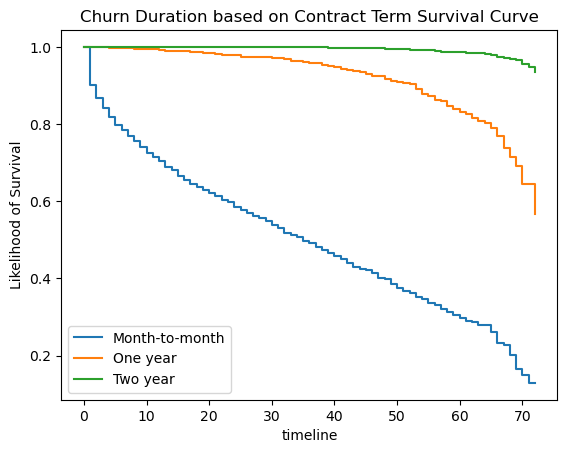

In [36]:
# Group 1: Month-to-month
kmf_ch1 = KaplanMeierFitter() 
T1 = df.loc[df['Contract'] == 'Month-to-month', 'tenure']
E1 = df.loc[df['Contract'] == 'Month-to-month', 'Churn']
kmf_ch1.fit(T1, E1, label='Month-to-month')   
ax = kmf_ch1.plot(ci_show=False)

# Group 2: One year
kmf_ch2 = KaplanMeierFitter() 
T2 = df.loc[df['Contract'] == 'One year', 'tenure']
E2 = df.loc[df['Contract'] == 'One year', 'Churn']
kmf_ch2.fit(T2, E2, label='One year')   
ax = kmf_ch2.plot(ci_show=False)

# Group 3: Two year
kmf_ch3 = KaplanMeierFitter() 
T3 = df.loc[df['Contract'] == 'Two year', 'tenure']
E3 = df.loc[df['Contract'] == 'Two year', 'Churn']
kmf_ch3.fit(T3, E3, label='Two year')   
ax = kmf_ch3.plot(ci_show=False)

plt.title("Churn Duration based on Contract Term Survival Curve")
plt.ylabel('Likelihood of Survival');

The month-to-month contract has a very short likelihood of survival, the curve reaches 0% at around 70 months, and reaches 50% probability of survival around 35 months. While the two-year contract has a very high likelihood of survival since the customers who have the subscription for 2 years likely are satisfied with the service and are not going to churn. The one-year subscription drops a lot ater the 60 month mark, which shows that the length for the one-year is about half the length of survival and probability as those with the two-year subscription.

---
## Data Processing

This portion compares the correlation of different variables with ``Churn`` and ``tenure``.

In [37]:
# Turn categorical variables into numbers
df_copy = df.copy()
columns = df_copy.columns
label_encoder = LabelEncoder()
for col in columns:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])
df_copy

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3625,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3571,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,3701,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,6305,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,1265,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,1157,1


In [38]:
# Find the correlation between Churn and other variables
correlation_matrix_churn = df_copy.corr()
churn_correlation = correlation_matrix_churn['Churn'].sort_values(ascending=False)
print(churn_correlation)

Churn                1.000000
PaperlessBilling     0.191825
MonthlyCharges       0.183523
Senior Citizen       0.150889
PaymentMethod        0.107062
Multiple Lines       0.038037
Phone Service        0.011942
Gender              -0.008612
Streaming TV        -0.036581
Streaming Movies    -0.038492
Internet Service    -0.047291
Partner             -0.150448
Dependents          -0.164221
Device Protection   -0.178134
Online Backup       -0.195525
TotalCharges        -0.230754
Tech Support        -0.282492
Online Security     -0.289309
tenure              -0.352229
Contract            -0.396713
Name: Churn, dtype: float64


Monthly Charges (0.183523):
* Monthly Charges out of the variables we analyzed has the highest correlation with churn
* Customers might churn due to the fact that the monthly charges might be too high
* This also might be associated with bundles, which comes with services that the customer doesn't use

Senior Citizens (0.150889):
* Citizens that are also older will have a higher association and probability of churning
* This might be because senior citizens are not as tech savvy and might not need as many subscriptions
* They might be more price sensitive and not need the telecommunication services

Tenure (-0.352229):
* df
    
Contract (-0.396713):
* Many of the customers who do have the one-year or two-year contract are less likely to cancel their subscription since the contract goes for a full one or two years
* If someone wants to cancel their subscription there also might be fees for cancelling earlier than their contract ends
* Those on year-long contract might also have discounts and bundles that incentivizes them to stay
                                                                                                                                    

In [39]:
# Find correlation between other variables with tenure
correlation_matrix_tenure = df_copy.corr()
tenure_correlation = correlation_matrix_tenure['tenure'].sort_values(ascending=False)
print(tenure_correlation)

tenure               1.000000
TotalCharges         0.870526
Contract             0.671607
Partner              0.379697
Device Protection    0.371105
Online Backup        0.370876
Multiple Lines       0.343032
Online Security      0.325468
Tech Support         0.322942
Streaming Movies     0.296866
Streaming TV         0.289373
MonthlyCharges       0.268133
Dependents           0.159712
Senior Citizen       0.016567
Phone Service        0.008448
PaperlessBilling     0.006152
Gender               0.005106
Internet Service    -0.030359
Churn               -0.352229
PaymentMethod       -0.370436
Name: tenure, dtype: float64


Total Charges (0.870526):
* This has the highest correlation
* Total Charges would depend on how long the customer stays with the company

Contract (0.671607):
* The contract type also heavily depends on the tenure
* The tenure would heavily depend on what type of contract they have
* If someone is the month-to month contract type, then they would have a shorter tenure since it's by month
* If someone has the one-year contract type, their tenure would be much longer since their subcription is making them stay for that long

Payment Method (-0.370436):
* The payment method may favor certain types of tenure, but it is negatively correlated. 
* One might assume that payment method might be correlated with tenure since a customer's payment method (such as the manual type) might make them more inclined to cancel their subscription
* The higher negative value might correspond to less reliable or manual payment methods
* The manual payment types are favored by newer customers and are at greater risk of churn

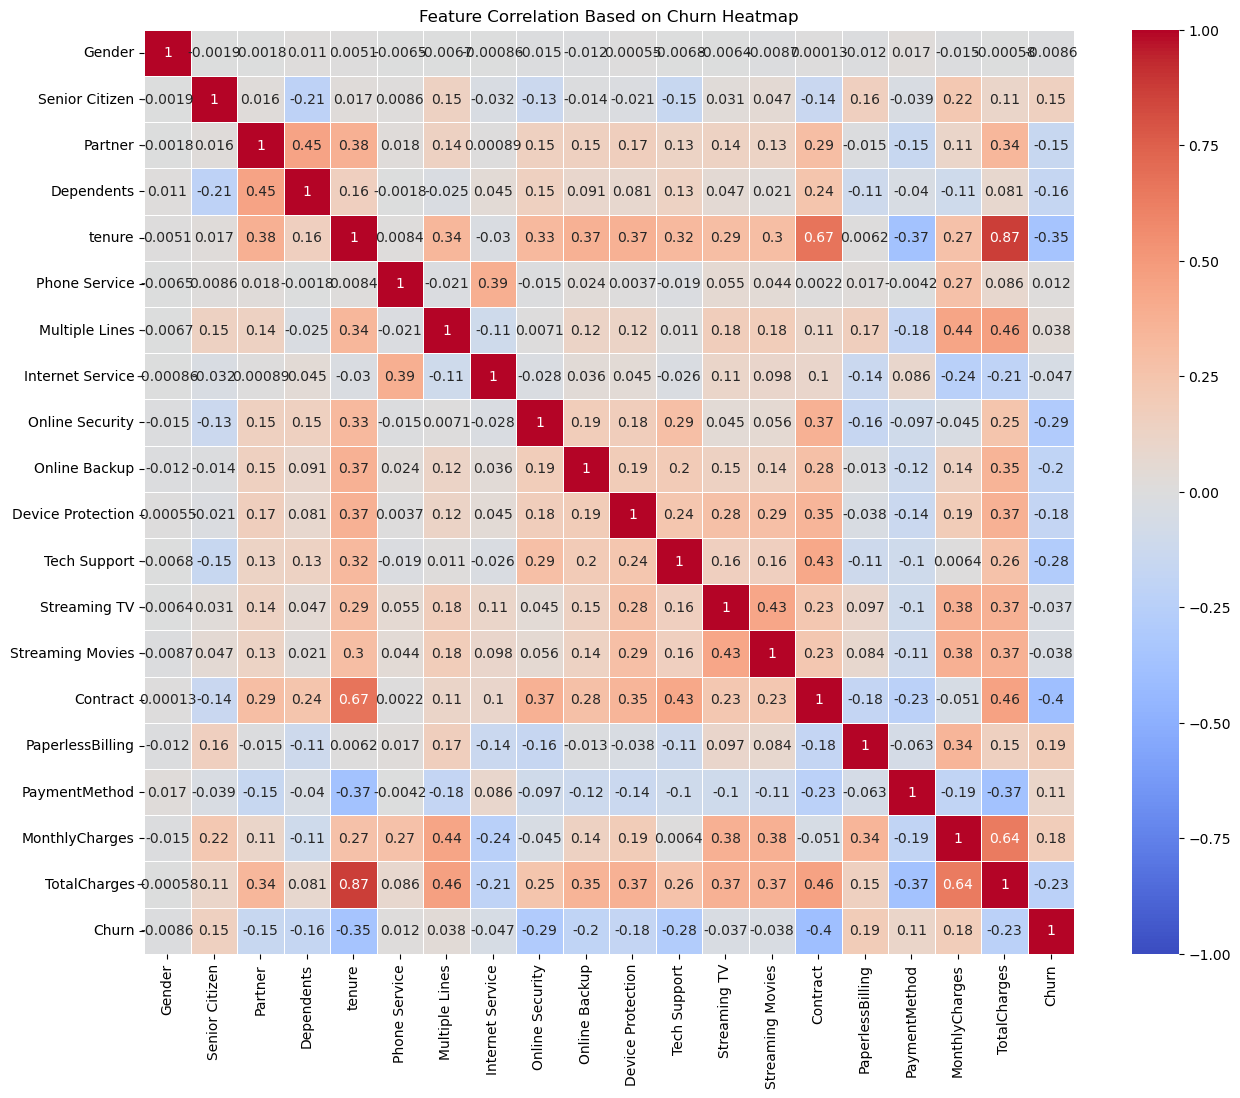

In [40]:
# Visualize with a heat map
plt.figure(figsize=(15, 12))  # Adjust figure size
sns.heatmap(correlation_matrix_churn, annot=True, cmap='coolwarm', linewidths=0.5, vmin = -1, vmax = 1)
plt.title('Feature Correlation Based on Churn Heatmap')
plt.show()

Split the data into the train and test set

In [41]:
# Define features and target
X = df_copy.drop(columns=['Churn']) 
y = df_copy['Churn']
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Machine Learning Models and Predictions

In [42]:
# Train with Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_RF = random_forest.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 79.63094393186657%


In [43]:
# Confusion matrix for Random Forest

confusion_matrix_RF = metrics.confusion_matrix(y_test, y_pred_RF)
confusion_matrix_RF

array([[946,  90],
       [197, 176]])

Text(0.5, 427.9555555555555, 'Predicted label')

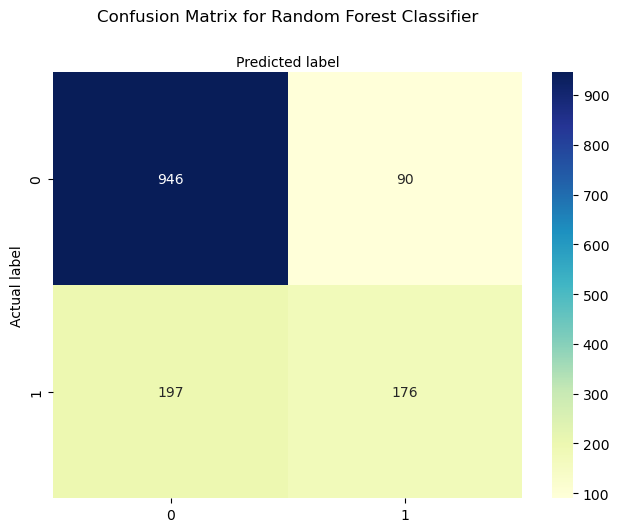

In [44]:
# Create confusion matrix heat map for Logistic Regression
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Random Forest Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred_RF, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1036
       Churn       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



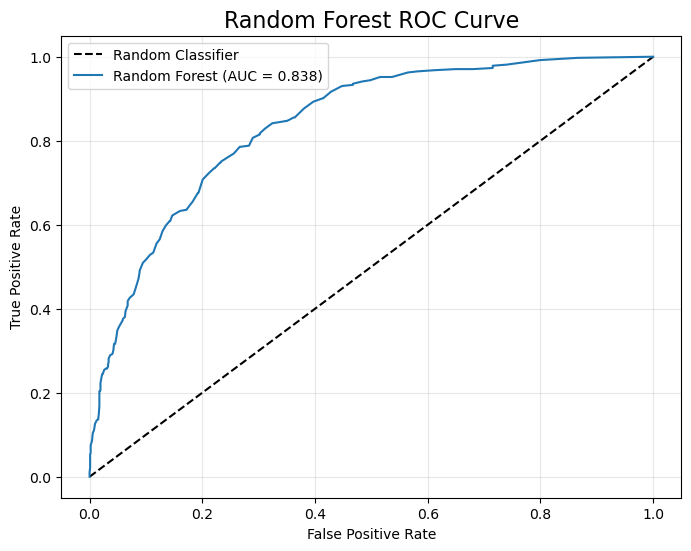

In [46]:
# Predict probabilities
y_probs = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_probs)
auc = metrics.roc_auc_score(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show();

The Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate. It shows the difference between positive and negative classes.

In [47]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
logisticRegr = LogisticRegression(max_iter=500)
logisticRegr.fit(X_train_scaled, y_train)

# Model evaluation
accuracy = logisticRegr.score(X_test_scaled, y_test)
y_pred_log = logisticRegr.predict(X_test_scaled)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 81.33427963094393%


In [48]:
# Create a regression table

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the regression table
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.412298
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7024
Method:                           MLE   Df Model:                           18
Date:                Tue, 27 May 2025   Pseudo R-squ.:                  0.2874
Time:                        22:38:13   Log-Likelihood:                -2903.8
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.0481      0.064     -0.755      0.450      -0.173       0.077
Senior C

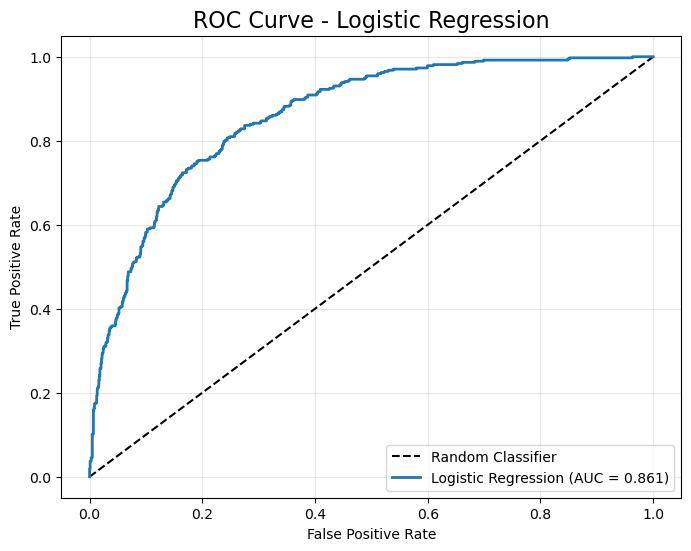

In [51]:
y_probs_log = logisticRegr.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_probs_log)
auc_log = auc(fpr_log, tpr_log)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Evaluate classification model for Logistical Regression Model

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_log)
confusion_matrix

In [ ]:
# Create confusion matrix heat map for Logistic Regression
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistical Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [ ]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred_log, target_names=target_names))